# Brain Stroke Prediction Using Machine Learning

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go


from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
 

from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

In [2]:
df = pd.read_csv('dataset.csv')

# Understand The Data

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


In [5]:
round(df.describe(include='all'),3)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,43400.000,43400,43400.000,43400.000,43400.000,43400,43400,43400,43400.000,41938.000,30108,43400.000
unique,NaN,3,NaN,NaN,NaN,2,5,2,NaN,NaN,3,NaN
top,NaN,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,NaN,25665,NaN,NaN,NaN,27938,24834,21756,NaN,NaN,16053,NaN
mean,36326.142,NaN,42.218,0.094,0.048,NaN,NaN,NaN,104.483,28.605,NaN,0.018
std,21072.135,NaN,22.520,0.291,0.213,NaN,NaN,NaN,43.112,7.770,NaN,0.133
min,1.000,NaN,0.080,0.000,0.000,NaN,NaN,NaN,55.000,10.100,NaN,0.000
25%,18038.500,NaN,24.000,0.000,0.000,NaN,NaN,NaN,77.540,23.200,NaN,0.000
50%,36351.500,NaN,44.000,0.000,0.000,NaN,NaN,NaN,91.580,27.700,NaN,0.000
75%,54514.250,NaN,60.000,0.000,0.000,NaN,NaN,NaN,112.070,32.900,NaN,0.000


In [6]:
df.shape

(43400, 12)

# Data Cleaning

In [7]:
#Removing unneccesary attribute id
df =df.drop('id', axis=1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             43400 non-null  object 
 1   age                43400 non-null  float64
 2   hypertension       43400 non-null  int64  
 3   heart_disease      43400 non-null  int64  
 4   ever_married       43400 non-null  object 
 5   work_type          43400 non-null  object 
 6   Residence_type     43400 non-null  object 
 7   avg_glucose_level  43400 non-null  float64
 8   bmi                41938 non-null  float64
 9   smoking_status     30108 non-null  object 
 10  stroke             43400 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 3.6+ MB


In [9]:
df.isna().sum()

gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

In [10]:
#Eliminating the null value rows
warnings.filterwarnings("ignore")
df['bmi'].fillna(value=df['bmi'].mean(), inplace=True)
mode_smoking_status = df['smoking_status'].mode()[0]
df['smoking_status'] = df['smoking_status'].fillna(mode_smoking_status)

In [11]:
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [12]:
df.shape

(43400, 11)

In [13]:
df['gender'].value_counts()

Female    25665
Male      17724
Other        11
Name: gender, dtype: int64

In [14]:
filtered_rows = df[(df['gender'] != 'Male') & (df['gender'] != 'Female')]
df= df.drop(filtered_rows.index)

In [15]:
num_cols = ['age','bmi','avg_glucose_level']
categorical_cols = ['gender','hypertension','heart_disease','ever_married', 'work_type', 'Residence_type','smoking_status','stroke']

# Data Visualization

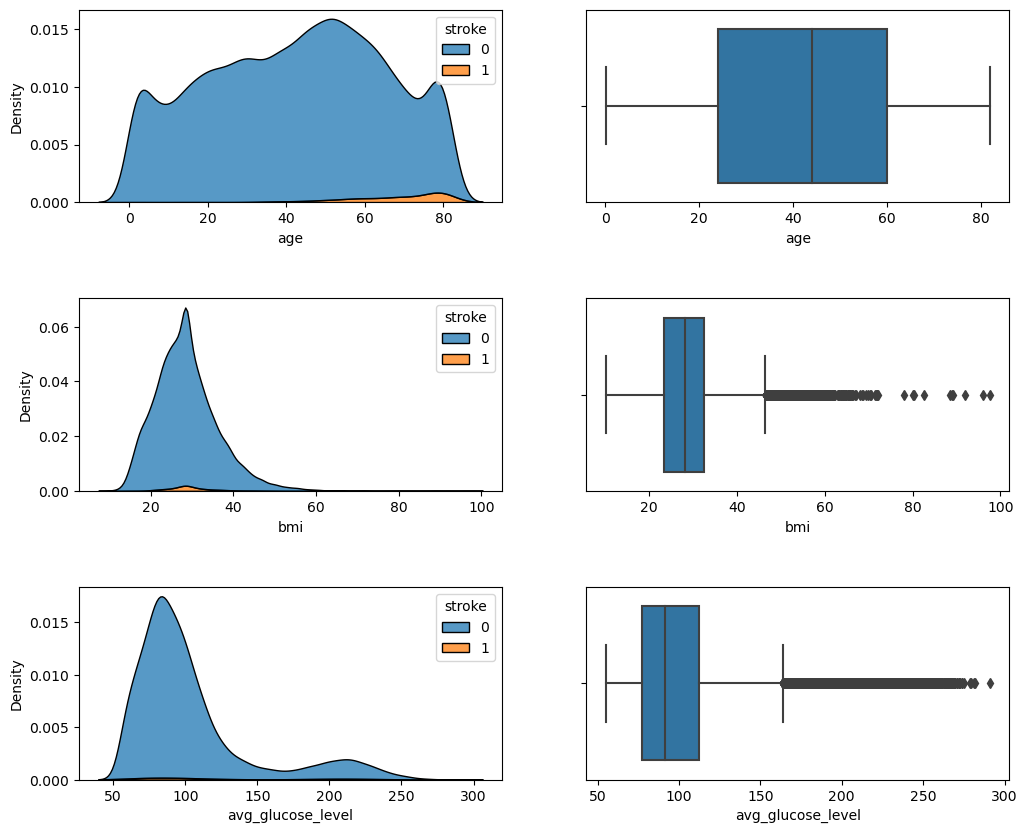

In [16]:
i=0
fig, ax= plt.subplots(3,2, figsize=(12,10))
plt.subplots_adjust(hspace=0.5)
for col in num_cols:
    sns.kdeplot(x=col, hue='stroke', data=df, multiple='stack', ax=ax[i,0])
    sns.boxplot(x=col, data=df, ax=ax[i,1])
    i += 1
plt.show()

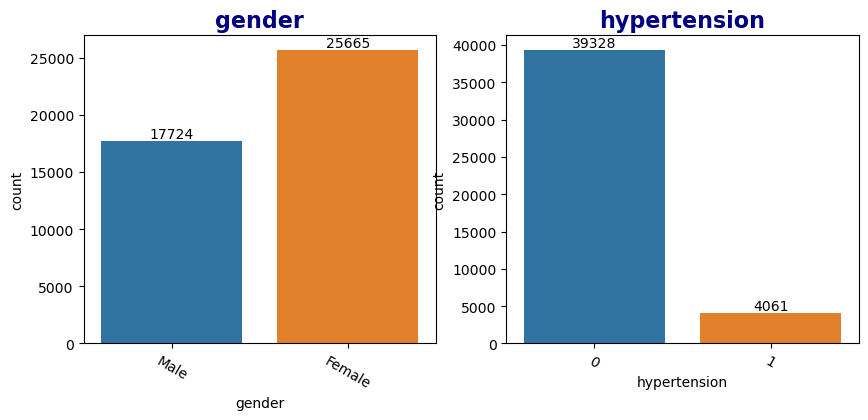

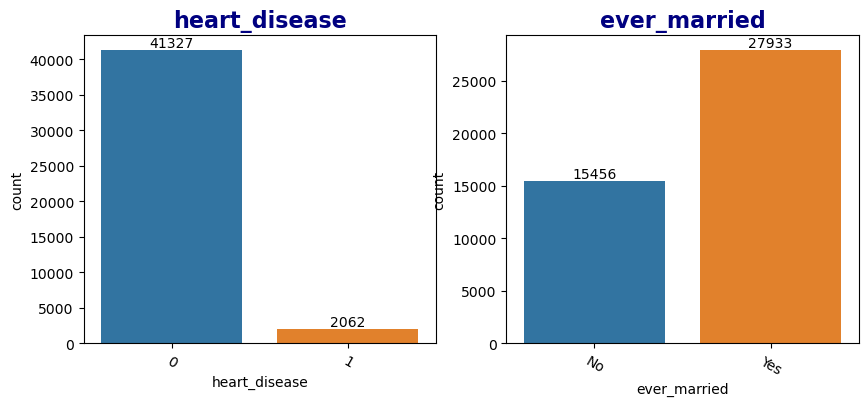

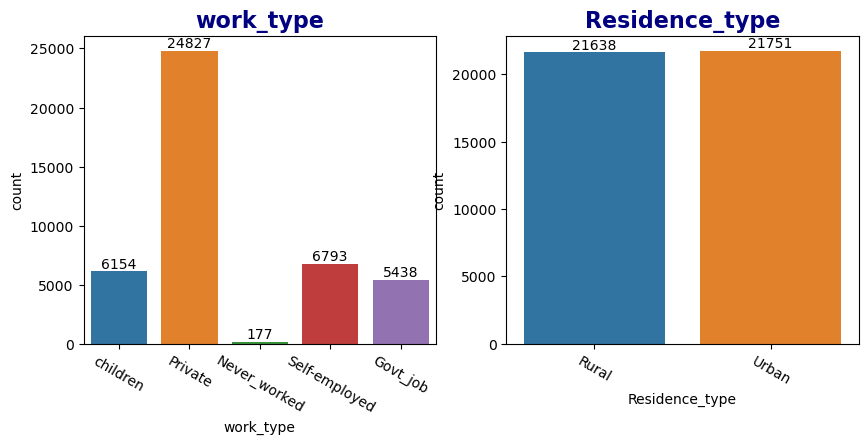

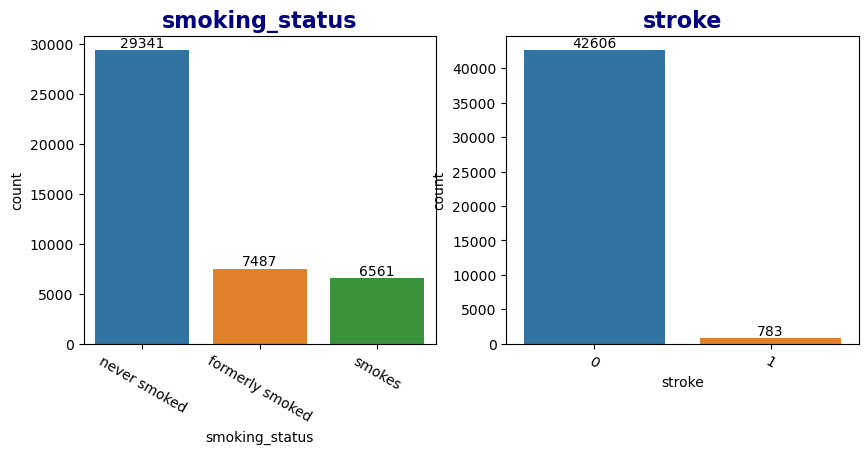

In [17]:
i=0
while i<8 :
    
    # Left Plot
    fig = plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.title(categorical_cols[i], size=16, weight='bold', color='navy')
    ax = sns.countplot(x=categorical_cols[i], data=df)
    ax.bar_label(ax.containers[0])
    ax.tick_params(axis='x', rotation=330)
   
    i+=1
    
    # Right Plot
    plt.subplot(1, 2, 2)
    plt.title(categorical_cols[i], size=16, weight='bold', color='navy')
    ax = sns.countplot(x=categorical_cols[i], data=df)
    ax.bar_label(ax.containers[0])
    ax.tick_params(axis='x', rotation=330)
    i+=1
    plt.show()

# Data Preparation for Modelling

In [18]:
for col in categorical_cols :
    print('Column: ',col)
    for index, unique in enumerate(df[col].unique()):
        print(unique,' : ', index)
    print('*'*50)

Column:  gender
Male  :  0
Female  :  1
**************************************************
Column:  hypertension
0  :  0
1  :  1
**************************************************
Column:  heart_disease
0  :  0
1  :  1
**************************************************
Column:  ever_married
No  :  0
Yes  :  1
**************************************************
Column:  work_type
children  :  0
Private  :  1
Never_worked  :  2
Self-employed  :  3
Govt_job  :  4
**************************************************
Column:  Residence_type
Rural  :  0
Urban  :  1
**************************************************
Column:  smoking_status
never smoked  :  0
formerly smoked  :  1
smokes  :  2
**************************************************
Column:  stroke
0  :  0
1  :  1
**************************************************


In [19]:
#Converting values from object type to integer
df['gender']=df['gender'].apply(lambda x: 1 if x =='Male' else 0)
df['ever_married']=df['ever_married'].apply(lambda x: 1 if x == 'Yes' else 0)
df['Residence_type']=df['Residence_type'].apply(lambda x: 1 if x =='Urban' else 0)

In [20]:
df['gender'].value_counts()

0    25665
1    17724
Name: gender, dtype: int64

In [21]:
df['ever_married'].value_counts()

1    27933
0    15456
Name: ever_married, dtype: int64

In [22]:
df['Residence_type'].value_counts()

1    21751
0    21638
Name: Residence_type, dtype: int64

In [23]:
df = pd.concat([df.drop('smoking_status', axis=1), pd.get_dummies(df['smoking_status']).add_prefix('smoking_status_')], axis=1 )
df = pd.concat([df.drop('work_type', axis=1), pd.get_dummies(df['work_type']).add_prefix('work_type_')], axis=1)

In [24]:
df['health_indicators_sum'] = df['hypertension'] + df['heart_disease']
df['glucose_bmi_ratio'] = df['avg_glucose_level'] / df['bmi']

In [25]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,health_indicators_sum,glucose_bmi_ratio
0,1,3.0,0,0,0,0,95.12,18.0,0,0,1,0,0,0,0,0,1,0,5.284444
1,1,58.0,1,0,1,1,87.96,39.2,0,0,1,0,0,0,1,0,0,1,2.243878
2,0,8.0,0,0,0,1,110.89,17.6,0,0,1,0,0,0,1,0,0,0,6.300568
3,0,70.0,0,0,1,0,69.04,35.9,0,1,0,0,0,0,1,0,0,0,1.923120
4,1,14.0,0,0,0,0,161.28,19.1,0,0,1,0,0,1,0,0,0,0,8.443979


# Model Preparation

In [26]:
X_temp = df.drop('stroke', axis=1)
y = df['stroke']

In [27]:
X_temp

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,health_indicators_sum,glucose_bmi_ratio
0,1,3.0,0,0,0,0,95.12,18.0,0,1,0,0,0,0,0,1,0,5.284444
1,1,58.0,1,0,1,1,87.96,39.2,0,1,0,0,0,1,0,0,1,2.243878
2,0,8.0,0,0,0,1,110.89,17.6,0,1,0,0,0,1,0,0,0,6.300568
3,0,70.0,0,0,1,0,69.04,35.9,1,0,0,0,0,1,0,0,0,1.923120
4,1,14.0,0,0,0,0,161.28,19.1,0,1,0,0,1,0,0,0,0,8.443979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43395,0,10.0,0,0,0,1,58.64,20.4,0,1,0,0,0,0,0,1,0,2.874510
43396,0,56.0,0,0,1,1,213.61,55.4,1,0,0,1,0,0,0,0,0,3.855776
43397,0,82.0,1,0,1,1,91.94,28.9,1,0,0,0,0,1,0,0,1,3.181315
43398,1,40.0,0,0,1,1,99.16,33.2,0,1,0,0,0,1,0,0,0,2.986747


In [28]:
y

0        0
1        0
2        0
3        0
4        0
        ..
43395    0
43396    0
43397    0
43398    0
43399    0
Name: stroke, Length: 43389, dtype: int64

In [29]:
#Normalization
scaler = MinMaxScaler().fit_transform(X_temp)
X = pd.DataFrame(scaler,columns=X_temp.columns)
X.describe()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,health_indicators_sum,glucose_bmi_ratio
count,43389.000000,43389.000000,43389.000000,43389.000000,43389.000000,43389.000000,43389.000000,43389.000000,43389.000000,43389.000000,43389.000000,43389.000000,43389.000000,43389.000000,43389.00000,43389.000000,43389.000000,43389.000000
mean,0.408491,0.514401,0.093595,0.047524,0.643781,0.501302,0.209645,0.211487,0.172555,0.676231,0.151213,0.125331,0.004079,0.572196,0.15656,0.141833,0.070559,0.209095
std,0.491560,0.274911,0.291268,0.212758,0.478887,0.500004,0.182653,0.087297,0.377867,0.467918,0.358261,0.331098,0.063740,0.494766,0.36339,0.348883,0.190359,0.106336
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.000000,0.291992,0.000000,0.000000,0.000000,0.000000,0.095488,0.152000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.133766
50%,0.000000,0.536133,0.000000,0.000000,1.000000,1.000000,0.154967,0.205714,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.182835
75%,1.000000,0.731445,0.000000,0.000000,1.000000,1.000000,0.241771,0.257143,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.258416
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [30]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43389 entries, 0 to 43388
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   gender                          43389 non-null  float64
 1   age                             43389 non-null  float64
 2   hypertension                    43389 non-null  float64
 3   heart_disease                   43389 non-null  float64
 4   ever_married                    43389 non-null  float64
 5   Residence_type                  43389 non-null  float64
 6   avg_glucose_level               43389 non-null  float64
 7   bmi                             43389 non-null  float64
 8   smoking_status_formerly smoked  43389 non-null  float64
 9   smoking_status_never smoked     43389 non-null  float64
 10  smoking_status_smokes           43389 non-null  float64
 11  work_type_Govt_job              43389 non-null  float64
 12  work_type_Never_worked          

In [31]:
#Splitting data
train_X, test_X, train_y,test_y = train_test_split(X,y, test_size = 0.3,random_state=0)


# Logistic Regression

In [32]:
log_reg=LogisticRegression()
log_reg.fit(train_X,train_y)

LogisticRegression()

In [33]:
predict_y = log_reg.predict(test_X)
predict_y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [34]:
log_reg.score(test_X, test_y)*100

98.19466851040947

In [35]:
from sklearn.metrics import precision_score, f1_score
classes_with_predictions = [cls for cls in range(len(test_y)) if cls in predict_y]
precision = precision_score(test_y,predict_y, labels=classes_with_predictions, average='micro')
f1 = f1_score(test_y,predict_y, labels=classes_with_predictions, average='micro')
print("Precision Score: ",precision*100)
print("F1 Score: ",f1*100)

Precision Score:  98.19466851040947
F1 Score:  99.08911198108454


In [36]:
lg_accuracy = accuracy_score(test_y, predict_y)
lg_accuracy*100

98.19466851040947

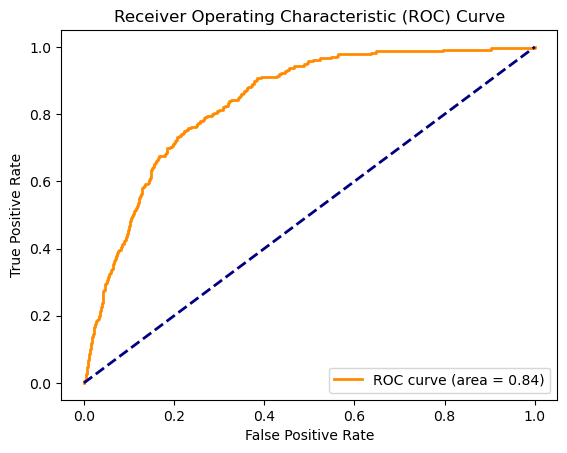

In [37]:
y_score = log_reg.predict_proba(test_X)[:, 1]
fpr, tpr, _ = roc_curve(test_y, y_score)
roc_auc = auc(fpr, tpr)


plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Random Forest

In [38]:
randomforest= RandomForestClassifier(criterion="entropy")
randomforest.fit(train_X, train_y)

RandomForestClassifier(criterion='entropy')

In [39]:
rf_y_pred= randomforest.predict(test_X)
rf_y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [40]:
rf_cr = metrics.classification_report(test_y, rf_y_pred)
print(rf_cr)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     12782
           1       0.25      0.00      0.01       235

    accuracy                           0.98     13017
   macro avg       0.62      0.50      0.50     13017
weighted avg       0.97      0.98      0.97     13017



In [41]:
rf_accuracy = accuracy_score(test_y, rf_y_pred)
rf_accuracy*100

98.1793039870938

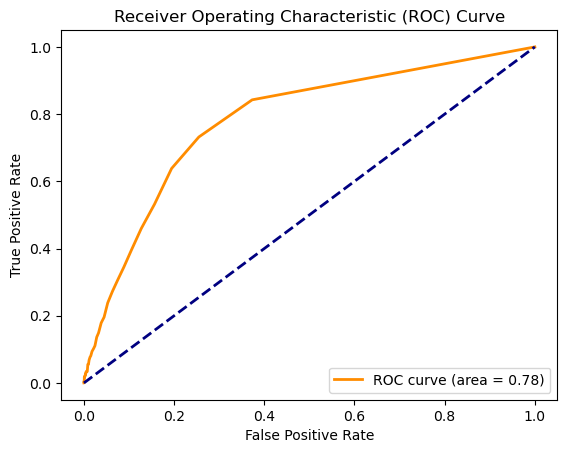

In [42]:
y_score = randomforest.predict_proba(test_X)[:, 1]
fpr, tpr, _ = roc_curve(test_y, y_score)
roc_auc = auc(fpr, tpr)


plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# KNNClassifier

In [43]:
KNN_classifier = KNeighborsClassifier(n_neighbors=7, metric='euclidean')  
KNN_classifier.fit(train_X,train_y)

KNeighborsClassifier(metric='euclidean', n_neighbors=7)

In [44]:
knn_y_pred= KNN_classifier.predict(test_X)
knn_y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [45]:
from sklearn.metrics import precision_score, f1_score
classes_with_predictions = [cls for cls in range(len(test_y)) if cls in knn_y_pred]
precision = precision_score(test_y,knn_y_pred, labels=classes_with_predictions, average='micro')
f1 = f1_score(test_y,knn_y_pred, labels=classes_with_predictions, average='micro')
print("Precision Score: ",precision*100)
print("F1 Score: ",f1*100)

Precision Score:  98.19466851040947
F1 Score:  99.08911198108454


In [46]:
knn_accuracy = accuracy_score(test_y, knn_y_pred)
knn_accuracy*100

98.19466851040947

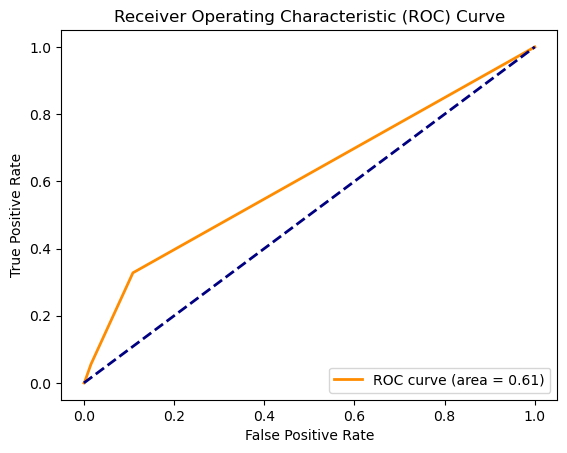

In [47]:
y_score = KNN_classifier.predict_proba(test_X)[:, 1]
fpr, tpr, _ = roc_curve(test_y, y_score)
roc_auc = auc(fpr, tpr)


plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Support Vector Machine(SVM)

In [48]:
from sklearn.svm import SVC

In [49]:
svm = SVC(kernel="rbf", gamma=0.9, C=1.9,probability=True)
svm.fit(train_X, train_y)

SVC(C=1.9, gamma=0.9, probability=True)

In [50]:
svm_pred = svm.predict(test_X)
svm_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [51]:
cr = metrics.classification_report(test_y, svm_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     12782
           1       0.00      0.00      0.00       235

    accuracy                           0.98     13017
   macro avg       0.49      0.50      0.50     13017
weighted avg       0.96      0.98      0.97     13017



In [52]:
svm_accuracy = accuracy_score(test_y, svm_pred)
svm_accuracy*100

98.16393946377814

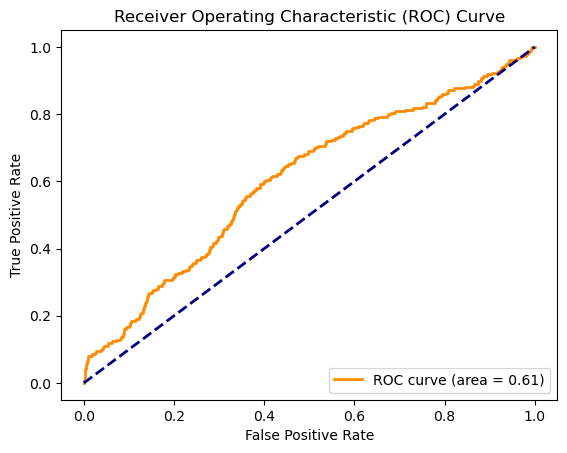

In [53]:
y_score = svm.predict_proba(test_X)[:, 1]
fpr, tpr, _ = roc_curve(test_y, y_score)
roc_auc = auc(fpr, tpr)


plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Decision Tree Classifier

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz

In [55]:
dtclassifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
dtclassifier.fit(train_X,train_y)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [56]:
dt_pred = dtclassifier.predict(test_X)
dt_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [57]:
cr = metrics.classification_report(test_y, dt_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     12782
           1       0.06      0.07      0.06       235

    accuracy                           0.96     13017
   macro avg       0.52      0.52      0.52     13017
weighted avg       0.97      0.96      0.97     13017



In [58]:
dtclassfier_accuracy = accuracy_score(test_y,dt_pred)
dtclassfier_accuracy*100

96.45079511408159

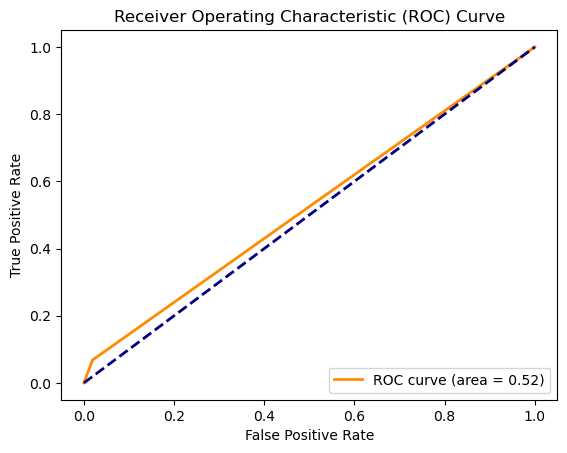

In [59]:
y_score = dtclassifier.predict_proba(test_X)[:, 1]
fpr, tpr, _ = roc_curve(test_y, y_score)
roc_auc = auc(fpr, tpr)


plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Naive Bayes

In [60]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [61]:
from sklearn.naive_bayes import GaussianNB 

In [62]:
navibayes = GaussianNB()
navibayes.fit(train_X,train_y)

GaussianNB()

In [63]:
n_pred = navibayes.predict(test_X)
n_pred

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [64]:
cr = metrics.classification_report(test_y, n_pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      0.20      0.33     12782
           1       0.02      0.99      0.04       235

    accuracy                           0.21     13017
   macro avg       0.51      0.60      0.19     13017
weighted avg       0.98      0.21      0.33     13017



In [65]:
n_accuracy = accuracy_score(test_y,n_pred)
n_accuracy*100

21.364369670430975

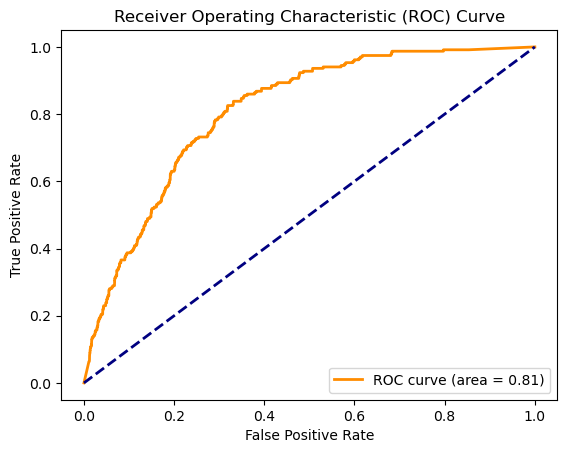

In [66]:
y_score = navibayes.predict_proba(test_X)[:, 1]
fpr, tpr, _ = roc_curve(test_y, y_score)
roc_auc = auc(fpr, tpr)


plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Gradient Boosting Classifier

In [67]:
from sklearn.ensemble import GradientBoostingClassifier
GBD= GradientBoostingClassifier(learning_rate=0.0001,random_state=1)
GBD.fit(train_X, train_y)
pred=GBD.predict(test_X)
accuracy_score(test_y,pred)*100

98.19466851040947

In [68]:
cr = metrics.classification_report(test_y, pred)
print(cr)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     12782
           1       0.00      0.00      0.00       235

    accuracy                           0.98     13017
   macro avg       0.49      0.50      0.50     13017
weighted avg       0.96      0.98      0.97     13017



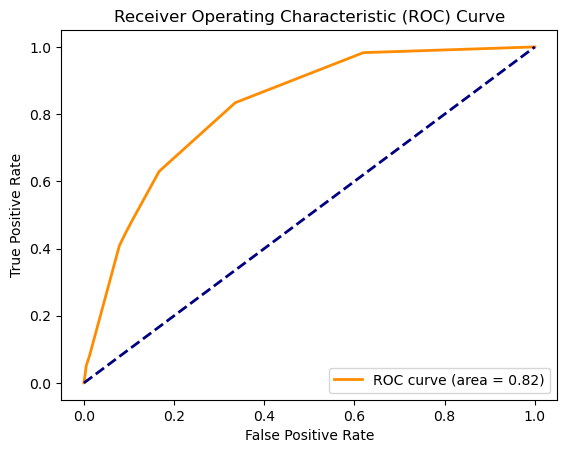

In [69]:
y_score = GBD.predict_proba(test_X)[:, 1]
fpr, tpr, _ = roc_curve(test_y, y_score)
roc_auc = auc(fpr, tpr)


plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Bagging Classifier

In [70]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
BC = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
BC.fit(train_X, train_y)
pred=BC.predict(test_X)
accuracy_score(test_y,pred)*100

98.11016363217331

In [71]:
cr = metrics.classification_report(test_y, pred)
print(cr)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     12782
           1       0.13      0.01      0.02       235

    accuracy                           0.98     13017
   macro avg       0.56      0.50      0.50     13017
weighted avg       0.97      0.98      0.97     13017



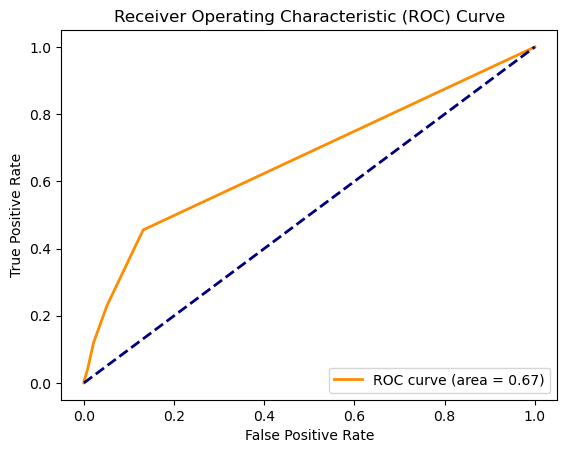

In [72]:
y_score = BC.predict_proba(test_X)[:, 1]
fpr, tpr, _ = roc_curve(test_y, y_score)
roc_auc = auc(fpr, tpr)


plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Ada Boost Classifier

In [73]:
from sklearn.ensemble import AdaBoostClassifier
ABC = AdaBoostClassifier(random_state=1)
ABC.fit(train_X,train_y)
pred=ABC.predict(test_X)
accuracy_score(test_y,pred)*100

98.1562572021203

In [74]:
cr = metrics.classification_report(test_y, pred)
print(cr)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     12782
           1       0.00      0.00      0.00       235

    accuracy                           0.98     13017
   macro avg       0.49      0.50      0.50     13017
weighted avg       0.96      0.98      0.97     13017



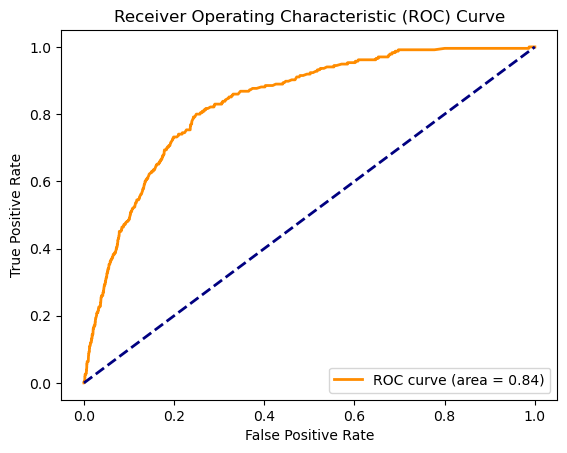

In [75]:
y_score = ABC.predict_proba(test_X)[:, 1]
fpr, tpr, _ = roc_curve(test_y, y_score)
roc_auc = auc(fpr, tpr)


plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# XG Boost Classifier

In [79]:
from xgboost import XGBClassifier
model=XGBClassifier(random_state=1,learning_rate=0.01)
model.fit(train_X, train_y)
model.score(test_X,test_y)*100

98.19466851040947

In [80]:
cr = metrics.classification_report(test_y, pred)
print(cr)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     12782
           1       0.00      0.00      0.00       235

    accuracy                           0.98     13017
   macro avg       0.49      0.50      0.50     13017
weighted avg       0.96      0.98      0.97     13017



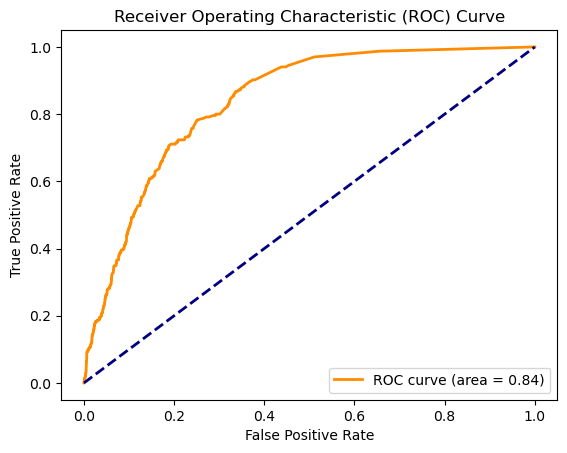

In [82]:
y_score = model.predict_proba(test_X)[:, 1]
fpr, tpr, _ = roc_curve(test_y, y_score)
roc_auc = auc(fpr, tpr)


plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [84]:
data = {
    'gender': [0],
    'age': [49.0],
    'hypertension': [1.0],
    'heart_disease':[0.0],
    'ever_married':[1],
    'Residence_type':[0],
    'avg_glucose_level':[220.34],
    'bmi': [27.4],
    'smoking_status_formerly smoked':[0],
    'smoking_status_never smoked':[1],
    'smoking_status_smokes':[0],
    'work_type_Govt_job':[0],
    'work_type_Never_worked': [0],
    'work_type_Private':[1],
    'work_type_Self-employed':[0],
    'work_type_children':[0] ,
    'health_indicators_sum':[0.07],
    'glucose_bmi_ratio':[0.02]
}
df2 = pd.DataFrame(data)
predicted = dtclassifier.predict(df2)
print(predicted)

[1]
